 # Import Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm
import cx_Oracle
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
%matplotlib inline

# Establish connection to database

In [2]:
conn = cx_Oracle.connect('carmi6/xxxxxxx@xxxxxxx:1521/dwtst_rf')

# Read in Zip Code CSV file
The CSV file has Zip Code, Latitude, and Longitude data

In [4]:
df = pd.read_csv('/home/carmi6/free-zipcode-database-Primary.csv', usecols=['Zipcode', 'Lat', 'Long'])
df.columns = ['Zip', 'lat', 'lon']
df['Zip'] = df['Zip'].astype(str).str[:5]
df.dropna()
print df



         Zip    lat     lon
0        705  18.14  -66.26
1        610  18.28  -67.14
2        611  18.28  -66.79
3        612  18.45  -66.73
4        601  18.16  -66.72
5        631  18.19  -66.82
6        602  18.38  -67.18
7        603  18.43  -67.15
8        604  18.43  -67.15
9        605  18.43  -67.15
10       703  18.25  -66.10
11       704  17.96  -66.22
12      7675  40.98  -74.03
13      7677  41.02  -74.05
14      7885  40.89  -74.58
15      7981  40.82  -74.41
16      7999  40.82  -74.41
17      8888  40.62  -74.76
18      8889  40.60  -74.76
19      7095  40.55  -74.28
20      7481  40.99  -74.16
21     10451  40.84  -73.87
22     10452  40.84  -73.87
23     10453  40.84  -73.87
24     10454  40.84  -73.87
25     10455  40.84  -73.87
26     10456  40.84  -73.87
27     10457  40.84  -73.87
28     10458  40.84  -73.87
29     10459  40.84  -73.87
...      ...    ...     ...
42492  97372  45.01 -123.87
42493  97425  43.47 -121.92
42494  97427  43.68 -122.79
42495  97428  43.74 

In [5]:
df['pos'] = df.lon.astype(str).str.cat(df.lat.astype(str), sep=' ')
df 

,Zip,lat,lon,pos
0,705,18.14,-66.26,-66.26 18.14
1,610,18.28,-67.14,-67.14 18.28
2,611,18.28,-66.79,-66.79 18.28
3,612,18.45,-66.73,-66.73 18.45
4,601,18.16,-66.72,-66.72 18.16
5,631,18.19,-66.82,-66.82 18.19
6,602,18.38,-67.18,-67.18 18.38
7,603,18.43,-67.15,-67.15 18.43
8,604,18.43,-67.15,-67.15 18.43
9,605,18.43,-67.15,-67.15 18.43


# Query 10000 rows from reports.srs_htn_patient table
This takes the query results and creates a Pandas dataframe

In [12]:
df2 = pd.read_sql("select * \
from reports.srs_HTN_patient \
WHERE ROWNUM <= 100000", conn)

# Takes only the first 5 characters in the Zip column

df2['Zip'] = df2['ZIP'].str[:5]


# Join the Latitude and Longitude data with the Zip Code data
Get the counts of each Zip Code

In [13]:
df3 = pd.merge(df2, df, on='Zip', how='inner')
count = df3['Zip'].value_counts().to_frame()
count = count.reset_index()
count.columns = ['Zip','Count']
final = pd.merge(count, df, on='Zip', how='inner')
print final

       Zip  Count    lat     lon            pos
0    92126   5505  32.88 -117.13  -117.13 32.88
1    92071   3288  32.85 -116.99  -116.99 32.85
2    92021   3261  32.84 -116.88  -116.88 32.84
3    91910   3142  32.63 -117.05  -117.05 32.63
4    92129   3026  32.96 -117.12  -117.12 32.96
5    92040   2892  32.90 -116.89   -116.89 32.9
6    92117   2880  32.81 -117.19  -117.19 32.81
7    92131   2798  32.89 -117.07  -117.07 32.89
8    92020   2743  32.79 -116.96  -116.96 32.79
9    91942   2693  32.78 -117.01  -117.01 32.78
10   92111   2641  32.80 -117.16   -117.16 32.8
11   92019   2499  32.77 -116.86  -116.86 32.77
12   91911   2475  32.61 -117.03  -117.03 32.61
13   92064   2424  32.97 -117.02  -117.02 32.97
14   91977   2390  32.71 -116.99  -116.99 32.71
15   92114   2213  32.71 -117.05  -117.05 32.71
16   91941   2182  32.75 -116.99  -116.99 32.75
17   92128   2170  32.99 -117.07  -117.07 32.99
18   92120   1913  32.79 -117.06  -117.06 32.79
19   92119   1751  32.81 -117.03  -117.0

In [14]:
final[['Zip','Count','lat','lon','pos']] = final[['Zip','Count','lat','lon','pos']].astype(str)
final[['Count','lat','lon']] = final[['Count','lat','lon']].astype(float)
# final[['Zip']] = final[['Zip']].astype(int)
final.dtypes

Zip       object
Count    float64
lat      float64
lon      float64
pos       object
dtype: object

In [15]:
# You need to have a LIST of FLOATS in order to plot
lat = final['lat'].tolist()
lon = final['lon'].tolist()
count = final['Count'].tolist()
zip1 = final['Zip'].tolist()
pos = final['pos'].tolist()

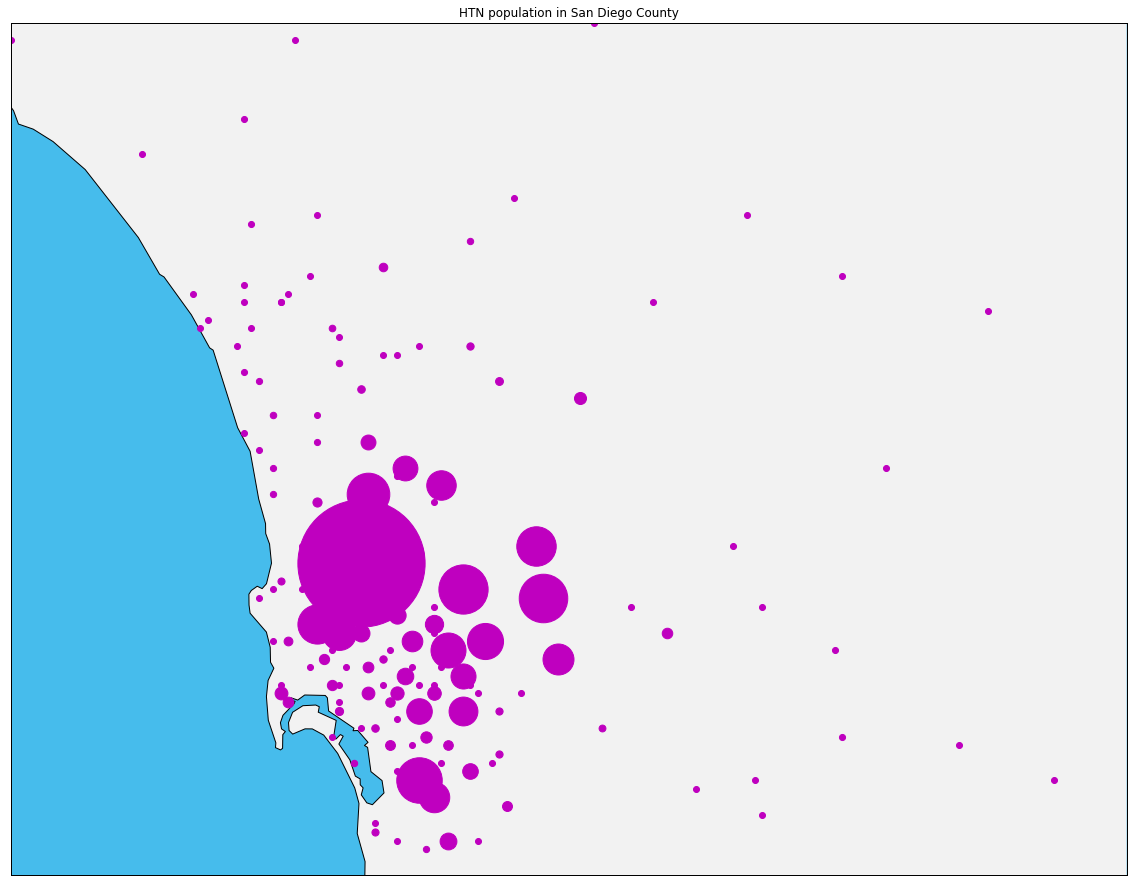

In [16]:
fig, ax = plt.subplots(figsize=(20,30))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.71, lon_0=-117.16,
            llcrnrlon=-117.61, llcrnrlat= 32.52, urcrnrlon=-116.08, urcrnrlat=33.50)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
plt.title('HTN population in San Diego County') 

def plot_area(zip): 
    count = final.loc[final.Zip == zip]['Count']
    pos = final.loc[final.Zip == zip]['pos'].tolist()
    lat = final.loc[final.Zip == zip]['lat'].tolist()
    lon = final.loc[final.Zip == zip]['lon'].tolist()
    x, y = m(lon, lat)
    size = (count/500) ** 2 + 6
    m.plot(x, y, marker='o', markersize = size, color='m')
final.Zip.apply(plot_area)
m

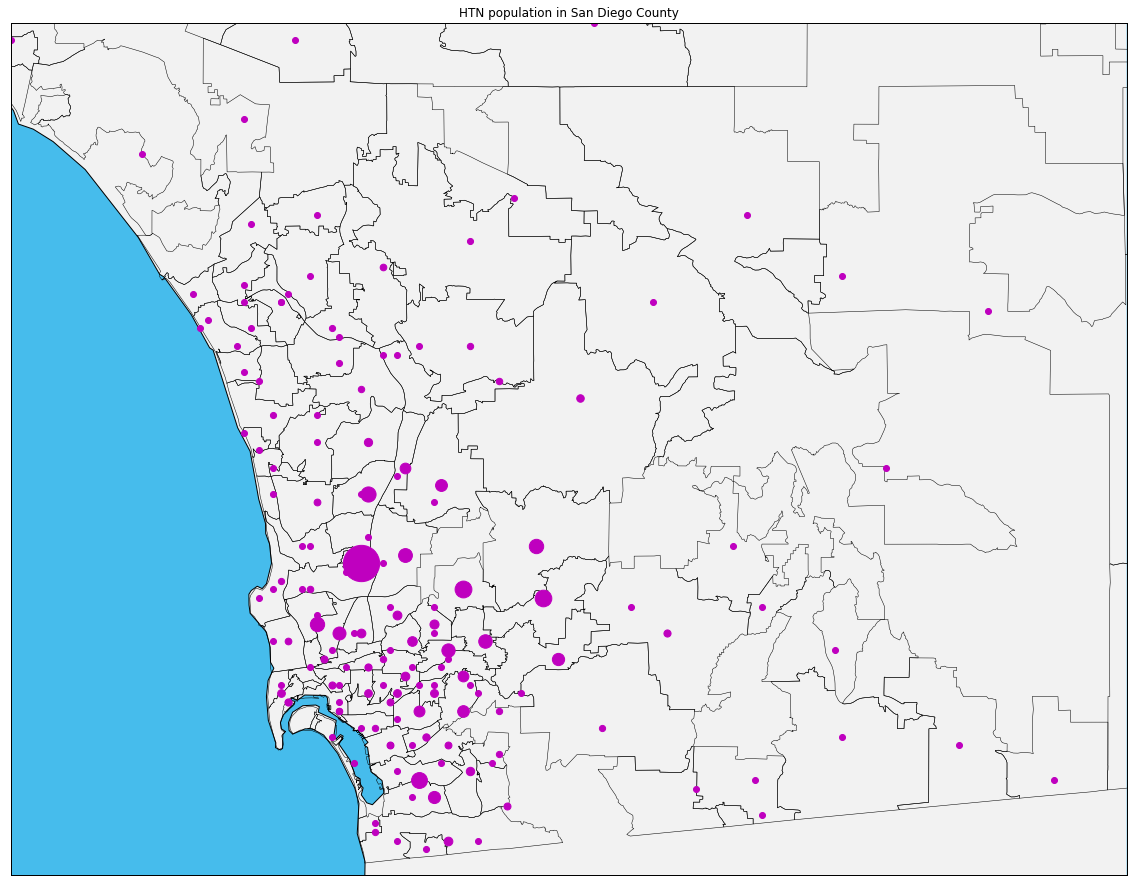

In [17]:
fig, ax = plt.subplots(figsize=(20,30))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.71, lon_0=-117.16,
            llcrnrlon=-117.61, llcrnrlat= 32.52, urcrnrlon=-116.08, urcrnrlat=33.50)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('./data/cb_2016_us_zcta510_500k', 'zip')
plt.title('HTN population in San Diego County') 

def plot_area(zip): 
    count = final.loc[final.Zip == zip]['Count']
    pos = final.loc[final.Zip == zip]['pos'].tolist()
    lat = final.loc[final.Zip == zip]['lat'].tolist()
    lon = final.loc[final.Zip == zip]['lon'].tolist()
    x, y = m(lon, lat)
    size = (count/1000) ** 2 + 6
    m.plot(x, y, marker='o', markersize = size, color='m')
final.Zip.apply(plot_area)
m

In [13]:
###working area

AttributeError: 'Basemap' object has no attribute 'areas_info'

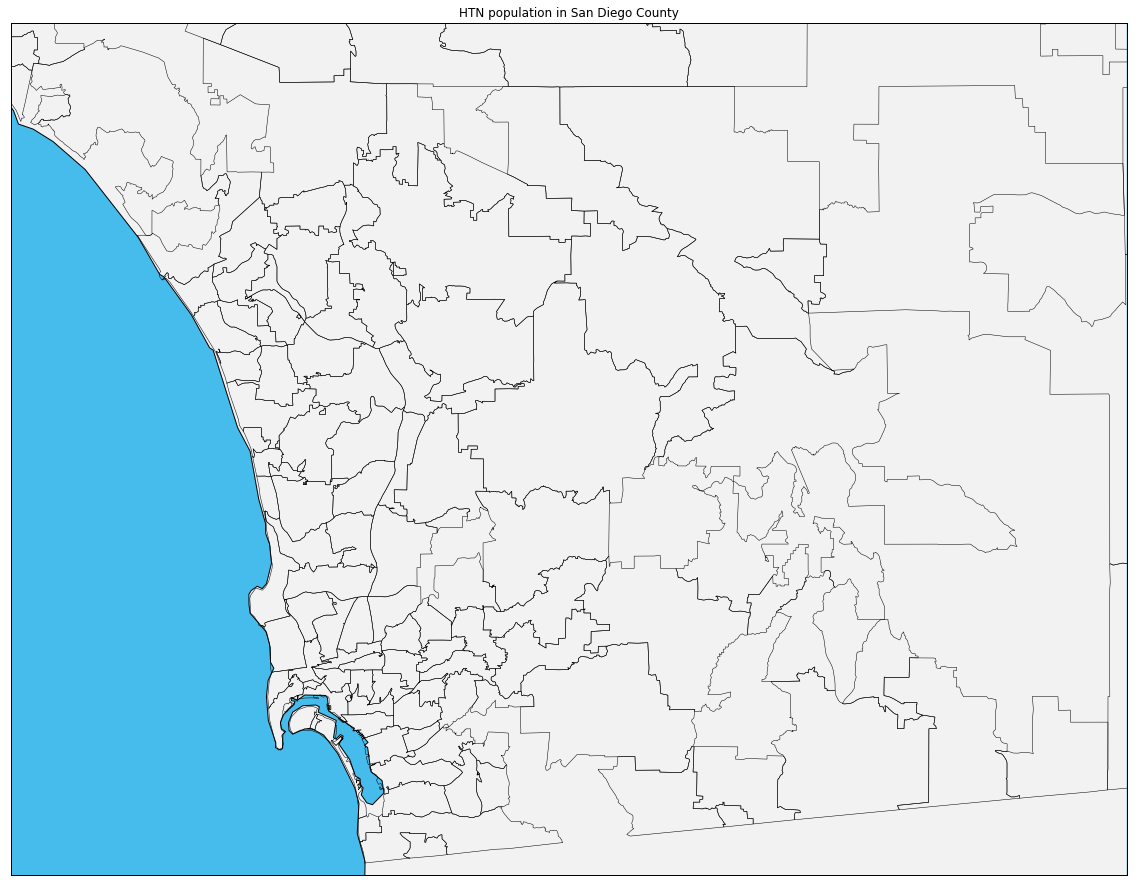

In [27]:
fig, ax = plt.subplots(figsize=(20,30))
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='merc',
            lat_0=32.71, lon_0=-117.16,
            llcrnrlon=-117.61, llcrnrlat= 32.52, urcrnrlon=-116.08, urcrnrlat=33.50)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('./data/cb_2016_us_zcta510_500k', 'zip')

plt.title('HTN population in San Diego County') 

df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.zip],
        'zip': [zip['name'] for area in m.areas_info]
    })
#df_poly = df_poly.merge(new_areas, on='zip', how='left')


In [28]:
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(df_poly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_poly['count'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_poly['count'])
plt.colorbar(mapper, shrink=0.4)

m

KeyError: 'count'

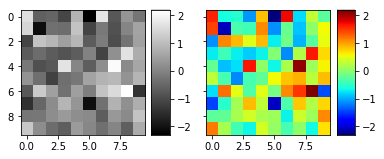

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
np.random.seed(1)

data = np.random.randn(10, 10)

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

im0 = grid[0].imshow(data, cmap='gray', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)

im1 = grid[1].imshow(data, cmap='jet', interpolation='nearest')
grid.cbar_axes[1].colorbar(im1)
plt.savefig('/tmp/test.png', bbox_inches='tight', pad_inches=0.0, dpi=200,)